# Sales Prediction :-

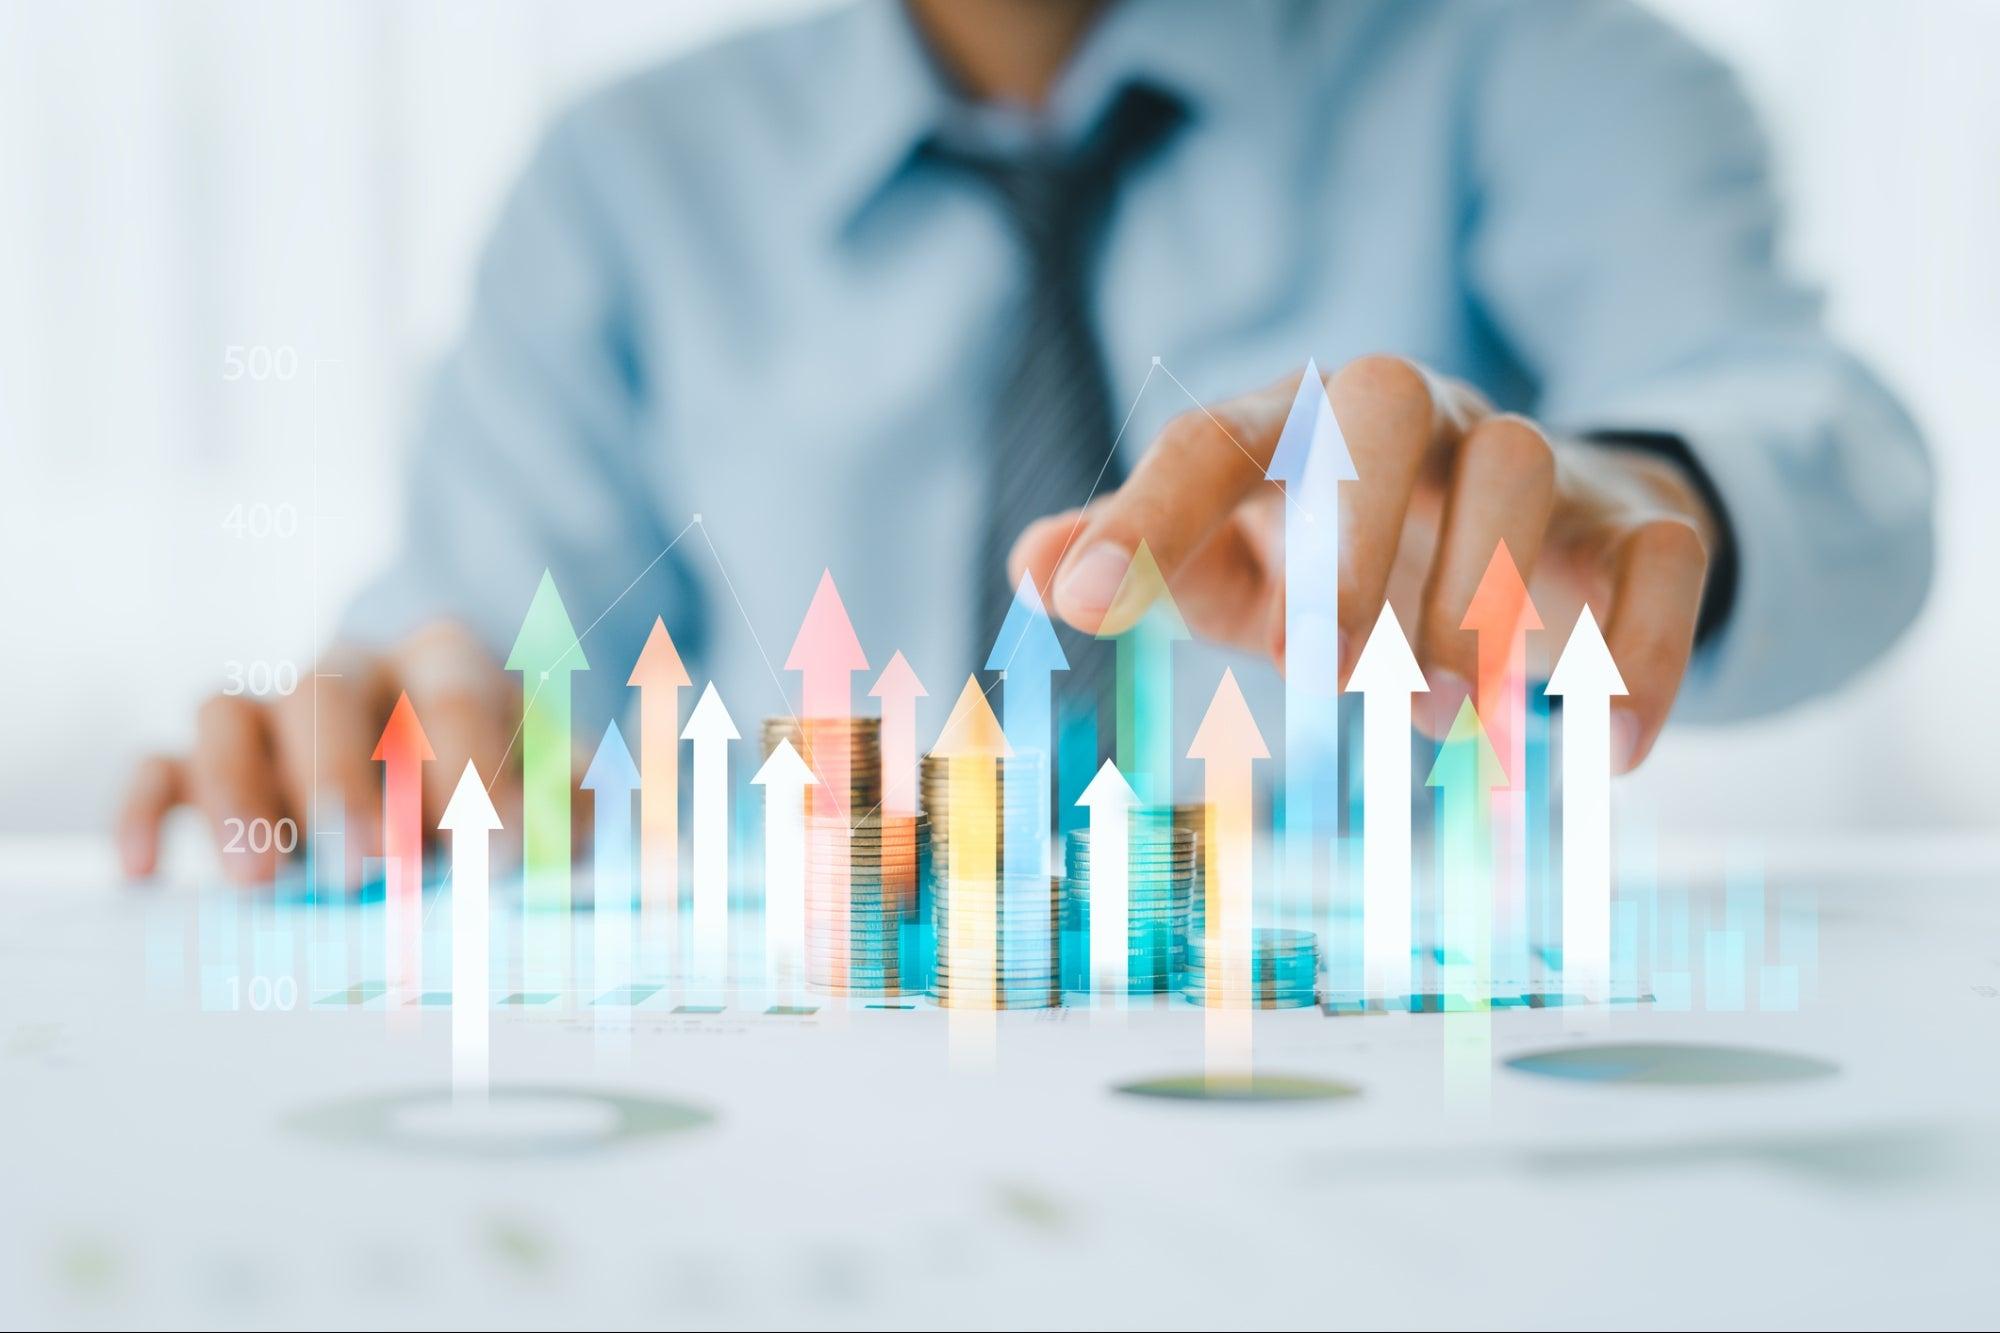

In [1]:
from IPython import display
display.Image("C:\\Users\\Rohan\\Desktop\\Sales.jpg")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statistics
import statsmodels
import scipy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv("C:\\Users\\Rohan\\Downloads\\advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 4)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Distribution

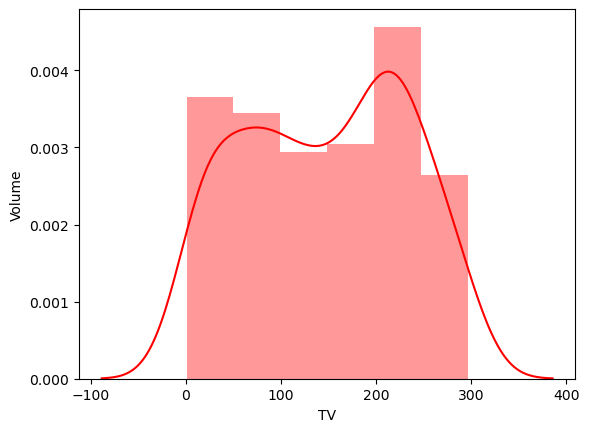

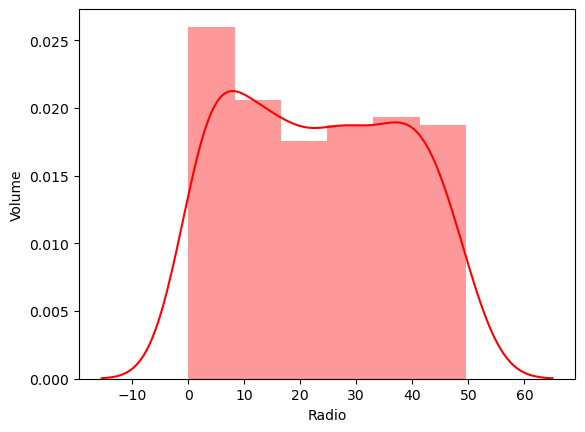

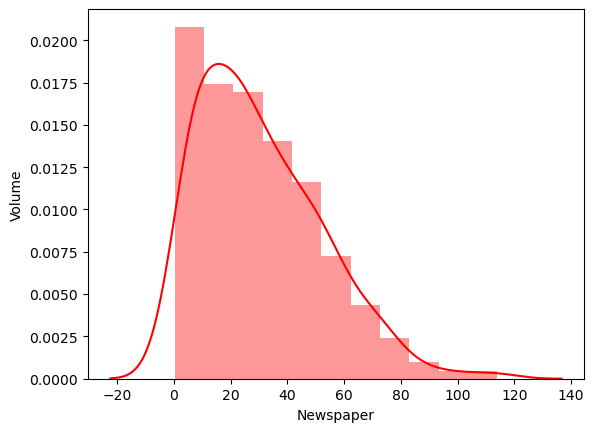

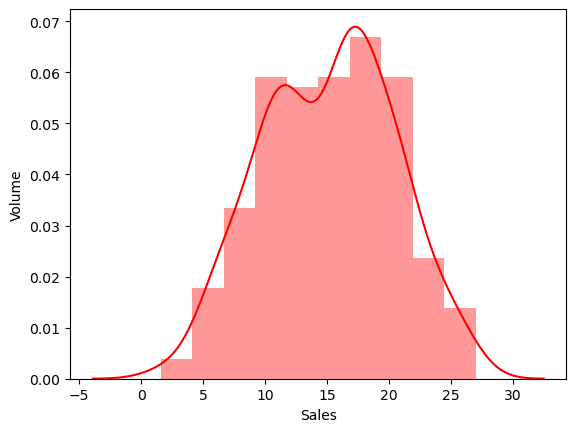

In [7]:
for d in df.columns:
    sns.distplot(df[d],color='red')
    plt.xlabel(d)
    plt.ylabel('Volume')
    plt.show()

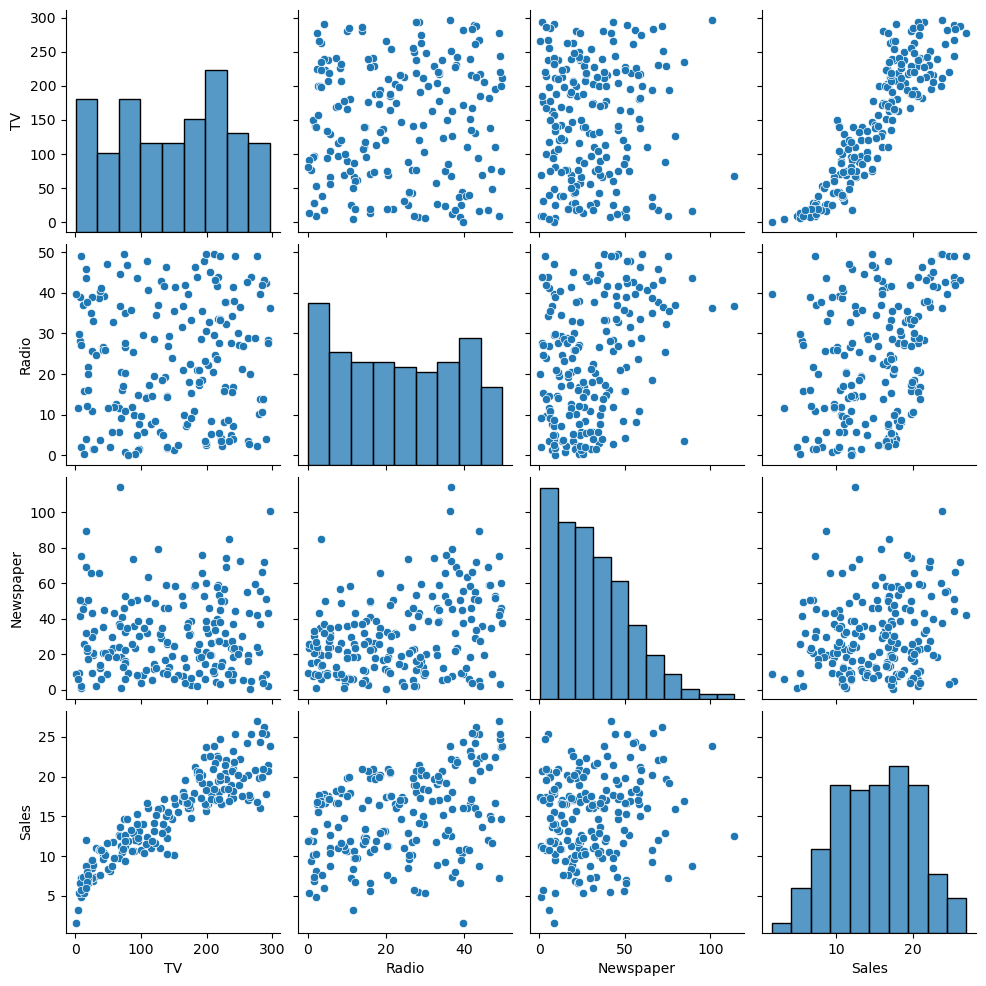

In [8]:
sns.pairplot(df)

## Correlation

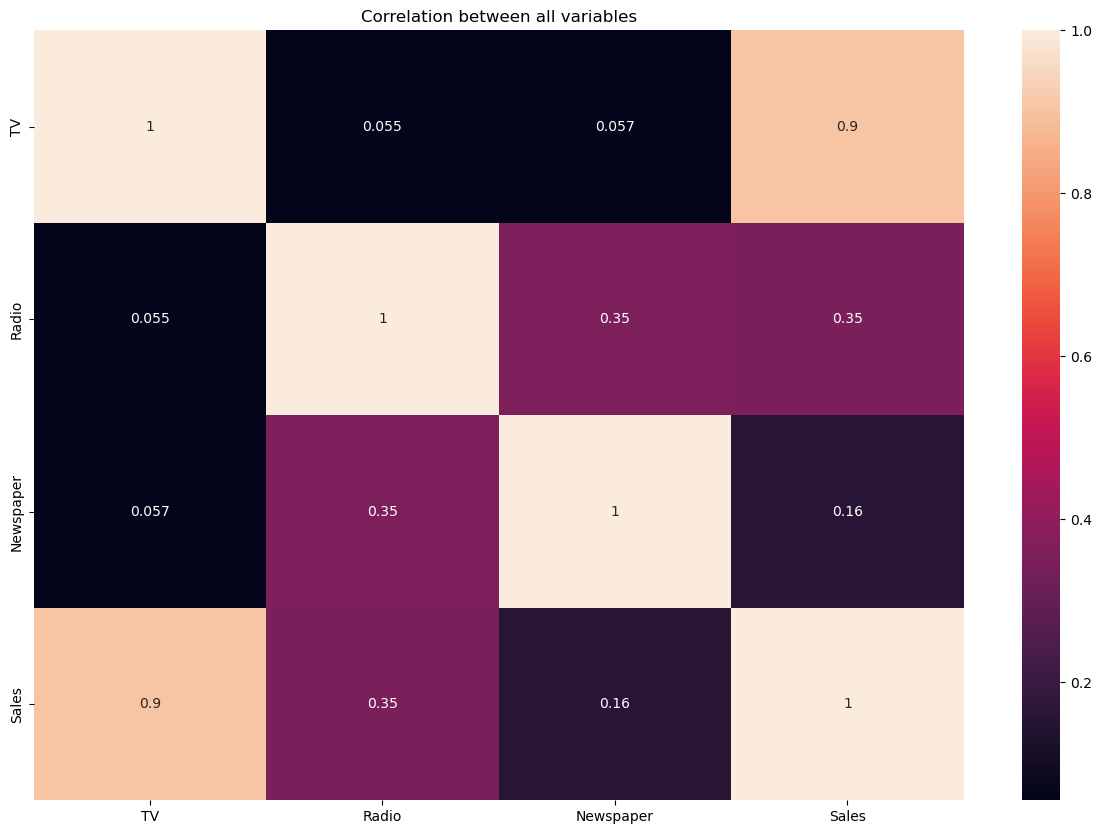

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between all variables')
plt.show()

## VIF

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
v=df.drop(['Sales'],axis=1)
vif=pd.DataFrame({'columns':v.columns})
vif['vif']=[variance_inflation_factor(v.values,r)
           for r in range(len(v.columns))]
vif

,columns,vif
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


## Outlier

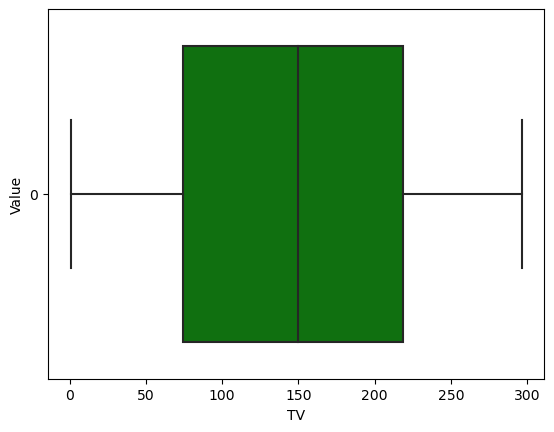

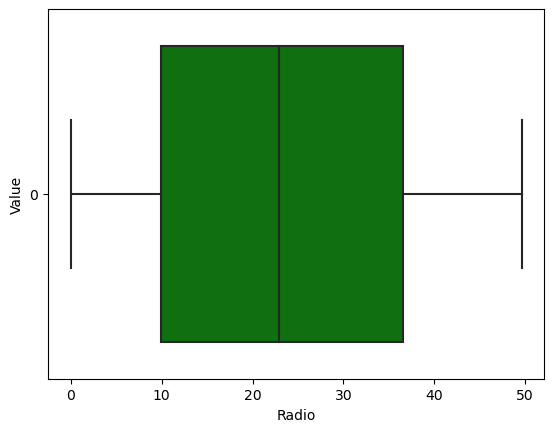

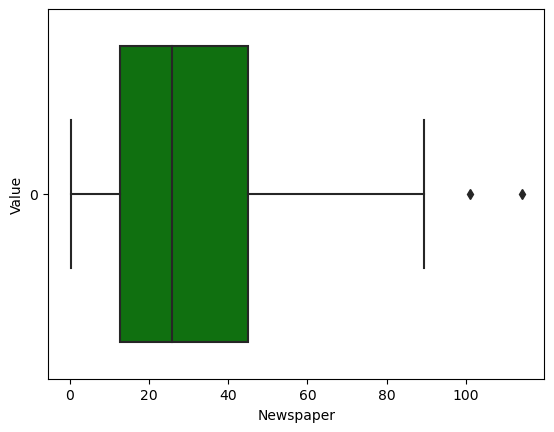

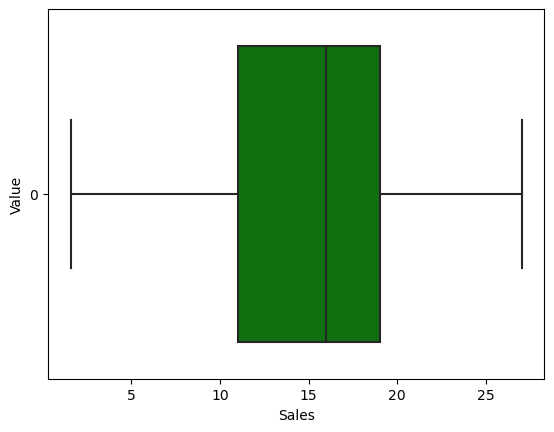

In [12]:
for o in df.columns:
    sns.boxplot(df[o],orient='h',color='green')
    plt.xlabel(o)
    plt.ylabel('Value')
    plt.show()

In [13]:
X=df.drop(['Sales'],axis=1)
Y=df['Sales']

## Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
std=StandardScaler()
X1=std.fit_transform(X)

In [16]:
!pip install optimal-data-selector

Defaulting to user installation because normal site-packages is not writeable


In [17]:
from optimal_data_selector.optimal import OptimalDataSelector

In [18]:
x_train,x_test,y_train,y_test = OptimalDataSelector(predictor=X1,target=Y,combination=15000,train_size=0.8,bs_problem='reg')

Accuracy can be ~ 0.9644400479418164
Computation time = 6.862434391180674  mints


In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(x_train,y_train)
lin.score(x_test,y_test)

0.9647045217548421

In [21]:
lin.score(x_train,y_train)

0.8806928148066892

In [22]:
y_pre=lin.predict(x_test)

## Performing Metrics

In [23]:
print('MSE value is = {}'.format(mean_squared_error(y_test,y_pre)))
print('MAE value is = {}'.format(mean_absolute_error(y_test,y_pre)))
R2=r2_score(y_test,y_pre)
print('R2 value is = '+str(R2))
print('Adjusted R2 value is = '+str(1-(1-R2)*(len(y_test)-1)/(len(y_test)-df.shape[1]-1)))

MSE value is = 1.1986556184925101
MAE value is = 0.8283330637844319
R2 value is = 0.9647045217548421
Adjusted R2 value is = 0.9606707528125383


# Ridge

In [24]:
from sklearn.linear_model import Ridge
rid=Ridge()
rid.fit(x_train,y_train)
rid.score(x_test,y_test)

0.9639654097657596

In [25]:
rid.score(x_train,y_train)

0.880656485230987

In [26]:
y_pre1=rid.predict(x_test)

## Performing Metrics

In [27]:
print('MSE value is = {}'.format(mean_squared_error(y_test,y_pre1)))
print('MAE value is = {}'.format(mean_absolute_error(y_test,y_pre1)))
R21=r2_score(y_test,y_pre1)
print('R2 value is = '+str(R21))
print('Adjusted R2 value is = '+str(1-(1-R21)*(len(y_test)-1)/(len(y_test)-df.shape[1]-1)))

MSE value is = 1.2237563051089437
MAE value is = 0.8329287465743868
R2 value is = 0.9639654097657596
Adjusted R2 value is = 0.9598471708818465


# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor
dis=DecisionTreeRegressor(random_state=88)
dis.fit(x_train,y_train)
dis.score(x_test,y_test)

0.9686106841457454

In [29]:
dis.score(x_train,y_train)

1.0

In [30]:
y_pre_dis=dis.predict(x_test)

## Performing Metrics

In [31]:
print('MSE value is = {}'.format(mean_squared_error(y_test,y_pre_dis)))
print('MAE value is = {}'.format(mean_absolute_error(y_test,y_pre_dis)))
R22=r2_score(y_test,y_pre_dis)
print('R2 value is = '+str(R22))
print('Adjusted R2 value is = '+str(1-(1-R22)*(len(y_test)-1)/(len(y_test)-df.shape[1]-1)))

MSE value is = 1.066
MAE value is = 0.885
R2 value is = 0.9686106841457454
Adjusted R2 value is = 0.965023333762402


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
for r in range(30,155,5):
    ran1=RandomForestRegressor(n_estimators=r,random_state=85)
    ran1.fit(x_train,y_train)
    print('For n_estimators = ',r,' accuracy is = '+str(ran1.score(x_test,y_test)))
    print()

For n_estimators =  30  accuracy is = 0.9755121539535684

For n_estimators =  35  accuracy is = 0.9768495051949155

For n_estimators =  40  accuracy is = 0.976946630801576

For n_estimators =  45  accuracy is = 0.976991623481183

For n_estimators =  50  accuracy is = 0.9771463372260797

For n_estimators =  55  accuracy is = 0.9778399645714873

For n_estimators =  60  accuracy is = 0.9785799328241159

For n_estimators =  65  accuracy is = 0.9791041198559822

For n_estimators =  70  accuracy is = 0.9793719916368875

For n_estimators =  75  accuracy is = 0.9795368109580581

For n_estimators =  80  accuracy is = 0.9797585566067739

For n_estimators =  85  accuracy is = 0.979094888240835

For n_estimators =  90  accuracy is = 0.979143971521683

For n_estimators =  95  accuracy is = 0.979051163950247

For n_estimators =  100  accuracy is = 0.9789631690841741

For n_estimators =  105  accuracy is = 0.9786331934900739

For n_estimators =  110  accuracy is = 0.9785274408657229

For n_estimators

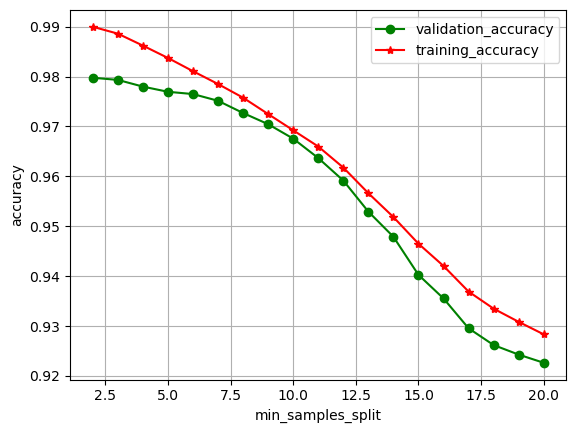

In [33]:
train=[]
test =[]
for d in range(2,21):
    ran2=RandomForestRegressor(n_estimators=80,random_state=85,min_samples_split=d)
    ran2.fit(x_train,y_train)
    test.append(ran2.score(x_test,y_test))
    train.append(ran2.score(x_train,y_train))
plt.plot([d1 for d1 in range(2,21)],test,color='green',marker='o',label='validation_accuracy')
plt.plot([d1 for d1 in range(2,21)],train,color='red',marker ='*',label ='training_accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.grid()
plt.legend()
plt.show()

In [34]:
ran =RandomForestRegressor(n_estimators=80,random_state=85,min_samples_split=2)
ran.fit(x_train,y_train)
ran.score(x_test,y_test)

0.9797585566067739

In [35]:
y_pre_ran = ran.predict(x_test)

## Performing Metrics

In [36]:
print('MSE value is = {}'.format(mean_squared_error(y_test,y_pre_ran)))
print('MAE value is = {}'.format(mean_absolute_error(y_test,y_pre_ran)))
R23=r2_score(y_test,y_pre_ran)
print('R2 value is = '+str(R23))
print('Adjusted R2 value is = '+str(1-(1-R23)*(len(y_test)-1)/(len(y_test)-df.shape[1]-1)))

MSE value is = 0.6874115624999936
MAE value is = 0.6673749999999962
R2 value is = 0.9797585566067739
Adjusted R2 value is = 0.9774452487904052


# SVM

In [37]:
from sklearn.svm import SVR
ker=['rbf','poly','linear','sigmoid']
for k in ker:
    svm1=SVR(kernel=k)
    svm1.fit(x_train,y_train)
    print('For kernel = ',k,' acuuracy = '+str(svm1.score(x_test,y_test)))
    print('For kernel = ',k,' accuracy = '+str(svm1.score(x_train,y_train)))
    print()

For kernel =  rbf  acuuracy = 0.8434139886131959
For kernel =  rbf  accuracy = 0.8590992615441706

For kernel =  poly  acuuracy = 0.7204367475936497
For kernel =  poly  accuracy = 0.7977775931508415

For kernel =  linear  acuuracy = 0.9565120908806575
For kernel =  linear  accuracy = 0.8764788099807395

For kernel =  sigmoid  acuuracy = 0.5159987924452252
For kernel =  sigmoid  accuracy = 0.4195109075231208



In [38]:
svm=SVR(kernel='linear')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.9565120908806575

In [39]:
svm.score(x_train,y_train)

0.8764788099807395

In [40]:
y_pre_lin=svm.predict(x_test)

## Performing Metrics

In [41]:
print('MSE value is = {}'.format(mean_squared_error(y_test,y_pre_lin)))
print('MAE value is = {}'.format(mean_absolute_error(y_test,y_pre_lin)))
R24=r2_score(y_test,y_pre_lin)
print('R2 value is = '+str(R24))
print('Adjusted R2 value is = '+str(1-(1-R24)*(len(y_test)-1)/(len(y_test)-df.shape[1]-1)))

MSE value is = 1.4768754864383444
MAE value is = 0.9592582922411449
R2 value is = 0.9565120908806575
Adjusted R2 value is = 0.9515420441241612


# KNN

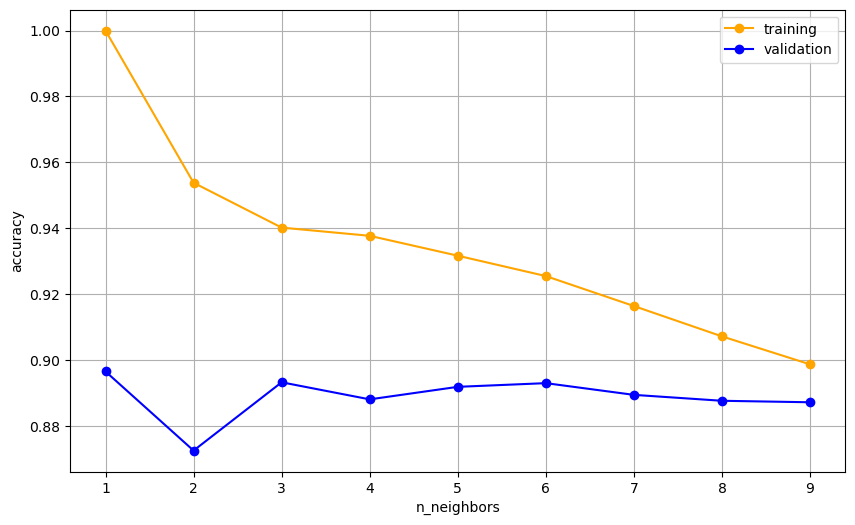

In [42]:
from sklearn.neighbors import KNeighborsRegressor
k_train=[]
k_test=[]
for k in range(1,10,1):
    knn1=KNeighborsRegressor(n_neighbors=k)
    knn1.fit(x_train,y_train)
    k_train.append(knn1.score(x_train,y_train))
    k_test.append(knn1.score(x_test,y_test))
plt.figure(figsize=(10,6))
plt.plot([k1 for k1 in range(1,10,1)],k_train,color='orange',label='training',marker='o')
plt.plot([k1 for k1 in range(1,10,1)],k_test,color='blue',label='validation',marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.grid()
plt.legend()
plt.show()

In [43]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8932185794387876

In [44]:
knn.score(x_train,y_train)

0.9401806714909343

In [45]:
y_pre_knn =knn.predict(x_test)

## Performing Metrics


In [46]:
print('MSE value is = {}'.format(mean_squared_error(y_test,y_pre_knn)))
print('MAE value is = {}'.format(mean_absolute_error(y_test,y_pre_knn)))
R25=r2_score(y_test,y_pre_knn)
print('R2 value is = '+str(R25))
print('Adjusted R2 value is = '+str(1-(1-R25)*(len(y_test)-1)/(len(y_test)-df.shape[1]-1)))

MSE value is = 3.626361111111111
MAE value is = 1.4525000000000001
R2 value is = 0.8932185794387876
Adjusted R2 value is = 0.8810149885175061


# Ensemble Learning
# Voting

In [47]:
from sklearn.ensemble import VotingRegressor
es=[('lin',lin),('rig',rid),('dis',dis),('ran',ran)]
es1=[('lin',lin),('ran',ran)]
es2=[('lin',lin),('ran',ran),('rig',rid)]
es3=[('lin',lin),('dis',dis),('ran',ran)]
es4=[('dis',dis),('ran',ran)]
es5=[('dis',dis),('lin',lin)]
es6=[('dis',dis),('lin',lin),('rig',rid),('svm',svm)]
es7=[('dis',dis),('lin',lin),('rig',rid)]
l_es=[es,es1,es2,es3,es4,es5,es6,es7]
for l in l_es:
    vot1=VotingRegressor(estimators=l)
    vot1.fit(x_train,y_train)
    print('For estimators = ',l,' accuracy = '+str(vot1.score(x_test,y_test)))
    print('Training accuracy is = '+str(vot1.score(x_train,y_train)))
    print()

For estimators =  [('lin', LinearRegression()), ('rig', Ridge()), ('dis', DecisionTreeRegressor(random_state=88)), ('ran', RandomForestRegressor(n_estimators=80, random_state=85))]  accuracy = 0.9793033516732481
Training accuracy is = 0.9648157953291854

For estimators =  [('lin', LinearRegression()), ('ran', RandomForestRegressor(n_estimators=80, random_state=85))]  accuracy = 0.978750114371761
Training accuracy is = 0.9582270160853489

For estimators =  [('lin', LinearRegression()), ('ran', RandomForestRegressor(n_estimators=80, random_state=85)), ('rig', Ridge())]  accuracy = 0.9752640694396978
Training accuracy is = 0.9374503028074406

For estimators =  [('lin', LinearRegression()), ('dis', DecisionTreeRegressor(random_state=88)), ('ran', RandomForestRegressor(n_estimators=80, random_state=85))]  accuracy = 0.9811674447845413
Training accuracy is = 0.9814342293712662

For estimators =  [('dis', DecisionTreeRegressor(random_state=88)), ('ran', RandomForestRegressor(n_estimators=80, 

In [48]:
vot=VotingRegressor(estimators=es3)
vot.fit(x_train,y_train)
vot.score(x_test,y_test)

0.9811674447845413

In [49]:
vot.score(x_train,y_train)

0.9814342293712662

In [50]:
y_pre_vot =vot.predict(x_test)

## Performing Metrics

In [51]:
print('MSE value is = {}'.format(mean_squared_error(y_test,y_pre_vot)))
print('MAE value is = {}'.format(mean_absolute_error(y_test,y_pre_vot)))
R26=r2_score(y_test,y_pre_vot)
print('R2 value is = '+str(R26))
print('Adjusted R2 value is = '+str(1-(1-R26)*(len(y_test)-1)/(len(y_test)-df.shape[1]-1)))

MSE value is = 0.6395648746501078
MAE value is = 0.6112383534121342
R2 value is = 0.9811674447845413
Adjusted R2 value is = 0.9790151527599175


# Bagging

In [52]:
from sklearn.ensemble import BaggingRegressor
fea=[0.5,0.6,0.7,0.8,0.9,1.0]
b_es=[ran,dis]
est=[]
acc1=[]
for b in b_es:
    for e in range(10,110,10):
        for f in fea:
            for s in fea:
                bag1=BaggingRegressor(base_estimator=b,
                                      n_estimators=e,max_features=f,max_samples=s,random_state=85)
                bag1.fit(x_train,y_train)
                acc1.append(bag1.score(x_test,y_test))
                est.append(['base_estimator = {}, n_esimators = {}, max_features = {}, max_samples ={}'.format(b,e,f,s)])
print('Best parameters are')
print(est[acc1.index(max(acc1))])
print('accuracy is = {}'.format(max(acc1)))           

Best parameters are
['base_estimator = DecisionTreeRegressor(random_state=88), n_esimators = 70, max_features = 1.0, max_samples =1.0']
accuracy is = 0.9794147227273095


In [53]:
bag=BaggingRegressor(base_estimator=dis,n_estimators=70,max_features=1.0,max_samples=1.0,random_state=85)
bag.fit(x_train,y_train)
bag.score(x_test,y_test)

0.9794147227273095

In [54]:
bag.score(x_train,y_train)

0.9896284063282946

In [55]:
y_pre_bag=bag.predict(x_test)

## Performing Metrics

In [56]:
print('MSE value is = {}'.format(mean_squared_error(y_test,y_pre_bag)))
print('MAE value is = {}'.format(mean_absolute_error(y_test,y_pre_bag)))
R27=r2_score(y_test,y_pre_bag)
print('R2 value is = '+str(R27))
print('Adjusted R2 value is = '+str(1-(1-R27)*(len(y_test)-1)/(len(y_test)-df.shape[1]-1)))

MSE value is = 0.6990883673469339
MAE value is = 0.665071428571425
R2 value is = 0.9794147227273095
Adjusted R2 value is = 0.9770621196104305


# Boosting

In [57]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [58]:
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
gr=GradientBoostingRegressor(random_state=85)
xg=XGBRegressor(random_state=85)
models=[gr,xg]
for e in b_es:
    ada=AdaBoostRegressor(estimator=e,random_state=85)
    ada.fit(x_train,y_train)
    print('For Model = AdaBoostRegressor, estimator = ',e,' accuracy is = '+str(ada.score(x_test,y_test)))
    print('Training accuracy is = '+str(ada.score(x_train,y_train)))
    print()
for m in models:
    m.fit(x_train,y_train)
    print('Model = ',m,' accuracy is = '+str(m.score(x_test,y_test)))
    print('Training accuracy is = '+str(m.score(x_train,y_train)))
    print()

For Model = AdaBoostRegressor, estimator =  RandomForestRegressor(n_estimators=80, random_state=85)  accuracy is = 0.9802091787523631
Training accuracy is = 0.9954473723808719

For Model = AdaBoostRegressor, estimator =  DecisionTreeRegressor(random_state=88)  accuracy is = 0.9723135044728303
Training accuracy is = 0.9997274812997231

Model =  GradientBoostingRegressor(random_state=85)  accuracy is = 0.9818007595397479
Training accuracy is = 0.9924111072090629

Model =  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None

In [59]:
gr1=GradientBoostingRegressor(random_state=85)
gr1.fit(x_train,y_train)
gr1.score(x_test,y_test)

0.9818007595397479

In [60]:
gr1.score(x_train,y_train)

0.9924111072090629

In [61]:
y_pre_gr=gr1.predict(x_test)

## Performing Metrics 

In [62]:
print('MSE value is = {}'.format(mean_squared_error(y_test,y_pre_gr)))
print('MAE value is = {}'.format(mean_absolute_error(y_test,y_pre_gr)))
R28=r2_score(y_test,y_pre_gr)
print('R2 value is = '+str(R28))
print('Adjusted R2 value is = '+str(1-(1-R28)*(len(y_test)-1)/(len(y_test)-df.shape[1]-1)))

MSE value is = 0.6180571255744371
MAE value is = 0.6123438960065224
R2 value is = 0.9818007595397479
Adjusted R2 value is = 0.9797208463442905


## Models & Accuracy

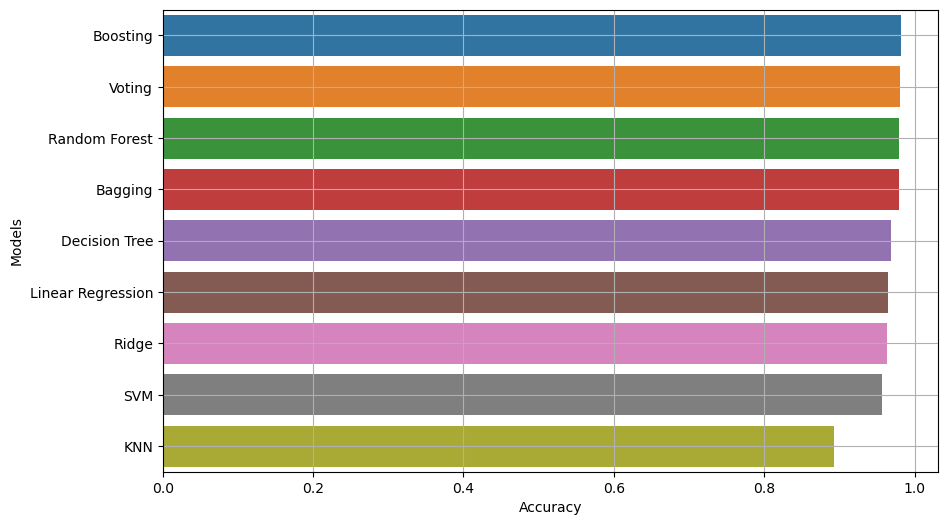

In [63]:
acc_df=pd.DataFrame({'Models':['Linear Regression','Ridge','Decision Tree','Random Forest',
                    'SVM','KNN','Voting','Bagging','Boosting'],'Accuracy':[R2,R21,R22,R23,R24,R25,R26,R27,R28]})
acc_df.sort_values('Accuracy',ascending=False,inplace=True)
plt.figure(figsize=(10,6))
sns.barplot(x=acc_df['Accuracy'],y=acc_df['Models'])
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.grid()
plt.show()

## Models Accuracy, MSE,  MAE & RMSE

In [64]:
dd={'MSE':[mean_squared_error(y_test,y_pre_gr),mean_squared_error(y_test,y_pre_vot),mean_squared_error(y_test,y_pre_ran),
          mean_squared_error(y_test,y_pre_bag),mean_squared_error(y_test,y_pre_dis),mean_squared_error(y_test,y_pre),
          mean_squared_error(y_test,y_pre1),mean_squared_error(y_test,y_pre_lin),mean_squared_error(y_test,y_pre_knn)],
   'MAE':[mean_absolute_error(y_test,y_pre_gr),mean_absolute_error(y_test,y_pre_vot),mean_absolute_error(y_test,y_pre_ran),
          mean_absolute_error(y_test,y_pre_bag),mean_absolute_error(y_test,y_pre_dis),mean_absolute_error(y_test,y_pre),
          mean_absolute_error(y_test,y_pre1),mean_absolute_error(y_test,y_pre_lin),mean_absolute_error(y_test,y_pre_knn)]}
for i,j in dd.items():
    acc_df[i] = j
acc_df['RMSE']=acc_df['MSE']**(1/2)
acc_df.index = range(0,len(acc_df))
acc_df

,Models,Accuracy,MSE,MAE,RMSE
0,Boosting,0.981801,0.618057,0.612344,0.786166
1,Voting,0.981167,0.639565,0.611238,0.799728
2,Random Forest,0.979759,0.687412,0.667375,0.829103
3,Bagging,0.979415,0.699088,0.665071,0.836115
4,Decision Tree,0.968611,1.066000,0.885000,1.032473
5,Linear Regression,0.964705,1.198656,0.828333,1.094831
6,Ridge,0.963965,1.223756,0.832929,1.106235
7,SVM,0.956512,1.476875,0.959258,1.215268
8,KNN,0.893219,3.626361,1.452500,1.904301


In [65]:
'''                                               Thank You                                               '''

'                                               Thank You                                               '